# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [39]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the data. 
# EPL results for the 2020/21 season

PLeague2021 = pd.read_excel('EPL_20212020_DATOS.xlsx')
print(PLeague2021.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2

In [41]:
#Assign new columns that capture home wins and away wins for every team
PLeague2021['hwinvalue']=np.where(PLeague2021['FTR']=='H',1,np.where(PLeague2021['FTR']=='D',.5,0))
PLeague2021['awinvalue']=np.where(PLeague2021['FTR']=='A',1,np.where(PLeague2021['FTR']=='D',.5,0))
PLeague2021['count']=1

## Step 3

In [60]:
#in order to make the prediction, first divide the dataset into two halfs, 2020 and 2021 games 
EPL2020 =PLeague2021[PLeague2021.Date < 20210000]
EPL2020.describe()
EPL2021 =PLeague2021[PLeague2021.Date > 20210000]
EPL2021.describe()

,Date,FTHG,FTAG,hwinvalue,awinvalue,count
count,2.250000e+02,225.000000,225.000000,225.000000,225.000000,225.0
mean,2.021031e+07,1.328889,1.293333,0.484444,0.515556,1.0
std,1.473117e+02,1.277662,1.185176,0.449184,0.449184,0.0
min,2.021010e+07,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.021020e+07,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.021031e+07,1.000000,1.000000,0.500000,0.500000,1.0
75%,2.021042e+07,2.000000,2.000000,1.000000,1.000000,1.0
max,2.021052e+07,9.000000,5.000000,1.000000,1.000000,1.0


## Step 4 

In [61]:
#Group the data set by Team and in two different dataframes, Home & Away, capturing for each one the number of wins, goals scored(FTHG) and goals against(FTAG)
EPL2020home = EPL2020.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2020home = EPL2020home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL2020home
EPL2020away = EPL2020.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2020away = EPL2020away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL2020away

<ipython-input-61-371fa3e1a94b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL2020home = EPL2020.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
<ipython-input-61-371fa3e1a94b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL2020away = EPL2020.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()


,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,8,3.5,8,7
1,Aston Villa,7,5.5,3,13
2,Brighton,8,3.5,13,11
3,Burnley,8,2.5,13,4
4,Chelsea,8,4.0,10,13
5,Crystal Palace,8,3.5,14,11
6,Everton,8,5.5,8,11
7,Fulham,7,2.0,11,7
8,Leeds,8,4.0,17,17
9,Leicester,8,6.5,8,18


## Step 5 

In [62]:
#merge together both datasets by team
EnglishPL2020 = pd.merge(EPL2020home, EPL2020away, on = ['team'])
EnglishPL2020

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,8,3.5,9,11,8,3.5,8,7
1,Aston Villa,7,3.5,15,11,7,5.5,3,13
2,Brighton,8,2.0,7,12,8,3.5,13,11
3,Burnley,7,3.5,5,7,8,2.5,13,4
4,Chelsea,8,5.5,18,8,8,4.0,10,13
5,Crystal Palace,8,3.5,9,15,8,3.5,14,11
6,Everton,7,4.5,15,11,8,5.5,8,11
7,Fulham,8,2.5,6,12,7,2.0,11,7
8,Leeds,8,4.0,13,13,8,4.0,17,17
9,Leicester,8,3.5,11,12,8,6.5,8,18


## Step 6 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wpc2020   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     106.2
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           5.63e-09
Time:                        01:00:25   Log-Likelihood:                 26.180
No. Observations:                  20   AIC:                            -48.36
Df Residuals:                      18   BIC:                            -46.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1683      0.036      4.688      0.000       0.093       0.244
pyth2020       0.6812      0.066     10.303      0.000       0.542       0.820
==============================================================================
Omnibus:                        0.933   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.387
Skew:                          -0.341   Prob(JB):                        0.824
Kurtosis:                       2.994   Cond. No.                         5.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

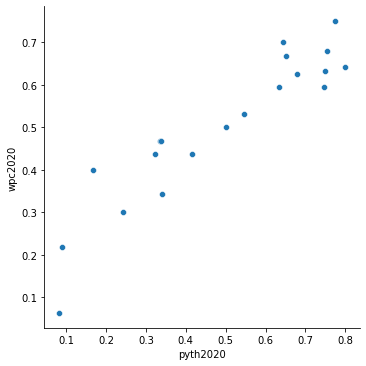

In [63]:
#Create Win (W) Games (G) Goals in Favor (GF) and Goals Against (GA) by adding values 
EnglishPL2020['W'] = EnglishPL2020['hwinvalue']+EnglishPL2020['awinvalue']
EnglishPL2020['G'] = EnglishPL2020['Ph']+EnglishPL2020['Pa']
EnglishPL2020['GF'] = EnglishPL2020['FTHGh']+EnglishPL2020['FTAGa']
EnglishPL2020['GA'] = EnglishPL2020['FTAGh']+EnglishPL2020['FTHGa']
EnglishPL2020
#using Bill James Pythagorean Expectation, applied to football, capture the expected win ratio 'pyth'
EnglishPL2020['wpc2020'] = EnglishPL2020['W']/EnglishPL2020['G']
EnglishPL2020['pyth2020'] = EnglishPL2020['GF']**2/(EnglishPL2020['GF']**2 + EnglishPL2020['GA']**2)
EnglishPL2020
sns.relplot(x="pyth2020", y="wpc2020", data =EnglishPL2020)
#Regression model for seeing r squared
pyth_lm = smf.ols(formula = 'wpc2020 ~ pyth2020', data=EnglishPL2020).fit()
pyth_lm.summary()

## Optional steps, not required for Assessment 
### (Uncomment to run)

## Step 7 

In [64]:
#Repeating the same process but with the second half of the data set, games in 2021
EPL2021home = EPL2021.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2021home = EPL2021home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL2021home
EPL2021away = EPL2021.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2021away = EPL2021away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL2021away

<ipython-input-64-25dcbf197310>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL2021home = EPL2021.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
<ipython-input-64-25dcbf197310>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  EPL2021away = EPL2021.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()


,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,11,8.0,10,24
1,Aston Villa,12,5.0,16,13
2,Brighton,11,4.0,11,7
3,Burnley,11,5.0,15,15
4,Chelsea,11,8.0,8,14
5,Crystal Palace,11,4.0,20,10
6,Everton,11,7.5,12,12
7,Fulham,12,5.5,14,11
8,Leeds,11,6.0,16,17
9,Leicester,11,7.0,12,16


## Step 8

In [65]:
EnglishPL2021 = pd.merge(EPL2021home, EPL2021away, on = ['team'])
EnglishPL2021

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,11,6.5,15,10,11,8.0,10,24
1,Aston Villa,12,5.5,14,16,12,5.0,16,13
2,Brighton,11,6.5,15,10,11,4.0,11,7
3,Burnley,12,3.5,9,20,11,5.0,15,15
4,Chelsea,11,6.5,13,10,11,8.0,8,14
5,Crystal Palace,11,5.0,11,17,11,4.0,20,10
6,Everton,12,3.5,9,17,11,7.5,12,12
7,Fulham,11,1.5,3,16,12,5.5,14,11
8,Leeds,9,5.0,12,7,11,6.0,16,17
9,Leicester,11,6.0,23,18,11,7.0,12,16


## Step 9

In [66]:
EnglishPL2021['W'] = EnglishPL2021['hwinvalue']+EnglishPL2021['awinvalue']
EnglishPL2021['G'] = EnglishPL2021['Ph']+EnglishPL2021['Pa']
EnglishPL2021['GF'] = EnglishPL2021['FTHGh']+EnglishPL2021['FTAGa']
EnglishPL2021['GA'] = EnglishPL2021['FTAGh']+EnglishPL2021['FTHGa']
EnglishPL2021


,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,11,6.5,15,10,11,8.0,10,24,14.5,22,39,20
1,Aston Villa,12,5.5,14,16,12,5.0,16,13,10.5,24,27,32
2,Brighton,11,6.5,15,10,11,4.0,11,7,10.5,22,22,21
3,Burnley,12,3.5,9,20,11,5.0,15,15,8.5,23,24,35
4,Chelsea,11,6.5,13,10,11,8.0,8,14,14.5,22,27,18
5,Crystal Palace,11,5.0,11,17,11,4.0,20,10,9.0,22,21,37
6,Everton,12,3.5,9,17,11,7.5,12,12,11.0,23,21,29
7,Fulham,11,1.5,3,16,12,5.5,14,11,7.0,23,14,30
8,Leeds,9,5.0,12,7,11,6.0,16,17,11.0,20,29,23
9,Leicester,11,6.0,23,18,11,7.0,12,16,13.0,22,39,30


## Step 10

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wpc2021   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.12e-11
Time:                        01:00:54   Log-Likelihood:                 35.870
No. Observations:                  20   AIC:                            -67.74
Df Residuals:                      18   BIC:                            -65.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2029      0.022      9.346      0.000       0.157       0.249
pyth2021       0.6102      0.040     15.129      0.000       0.525       0.695
==============================================================================
Omnibus:                        2.173   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.497
Skew:                           0.455   Prob(JB):                        0.473
Kurtosis:                       2.015   Cond. No.                         5.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

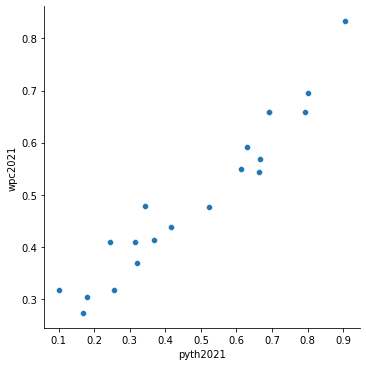

In [67]:
EnglishPL2021['wpc2021'] = EnglishPL2021['W']/EnglishPL2021['G']
EnglishPL2021['pyth2021'] = EnglishPL2021['GF']**2/(EnglishPL2021['GF']**2 + EnglishPL2021['GA']**2)
EnglishPL2021
sns.relplot(x="pyth2021", y="wpc2021", data =EnglishPL2021)
pyth_lm = smf.ols(formula = 'wpc2021 ~ pyth2021', data=EnglishPL2021).fit()
pyth_lm.summary()

In [68]:
#For last, merging the win percentage and pythagorean expectation for 2021 in order to compare the correlation
Half2predictor = pd.merge(EnglishPL2020,EnglishPL2021[['team','wpc2021','pyth2021']], on='team')
Half2predictor

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc2020,pyth2020,wpc2021,pyth2021
0,Arsenal,8,3.5,9,11,8,3.5,8,7,7.0,16,16,19,0.437500,0.414911,0.659091,0.791775
1,Aston Villa,7,3.5,15,11,7,5.5,3,13,9.0,14,28,14,0.642857,0.800000,0.437500,0.415859
2,Brighton,8,2.0,7,12,8,3.5,13,11,5.5,16,18,25,0.343750,0.341412,0.477273,0.523243
3,Burnley,7,3.5,5,7,8,2.5,13,4,6.0,15,9,20,0.400000,0.168399,0.369565,0.319822
4,Chelsea,8,5.5,18,8,8,4.0,10,13,9.5,16,31,18,0.593750,0.747860,0.659091,0.692308
5,Crystal Palace,8,3.5,9,15,8,3.5,14,11,7.0,16,20,29,0.437500,0.322321,0.409091,0.243646
6,Everton,7,4.5,15,11,8,5.5,8,11,10.0,15,26,19,0.666667,0.651880,0.478261,0.343994
7,Fulham,8,2.5,6,12,7,2.0,11,7,4.5,15,13,23,0.300000,0.242120,0.304348,0.178832
8,Leeds,8,4.0,13,13,8,4.0,17,17,8.0,16,30,30,0.500000,0.500000,0.550000,0.613869
9,Leicester,8,3.5,11,12,8,6.5,8,18,10.0,16,29,20,0.625000,0.677679,0.590909,0.628253


## Step 11

In [56]:
#Finding the correlation between expectation and Actual win percentage, you may find that 'Pyth2020' has a stronger correlation 
#with Win percentage (wpc2021) than 'wpc2020'. this means 'pyth' acts as a better predictor than the win percentage!
keyvars = Half2predictor[['team','wpc2020','wpc2021','pyth2020','pyth2021']]
keyvars.corr()

,wpc2020,wpc2021,pyth2020,pyth2021
wpc2020,1.000000,0.634625,0.936234,0.664194
wpc2021,0.634625,1.000000,0.654067,0.957708
pyth2020,0.936234,0.654067,1.000000,0.683563
pyth2021,0.664194,0.957708,0.683563,1.000000


## Step 12

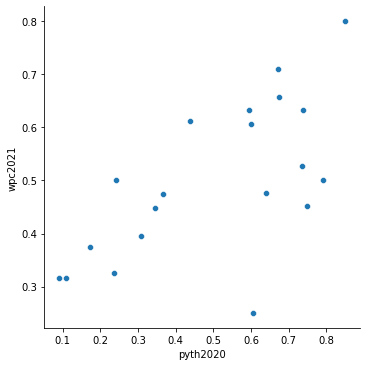

In [57]:
sns.relplot(x="pyth2020", y="wpc2021", data =Half2predictor)

## Step 13


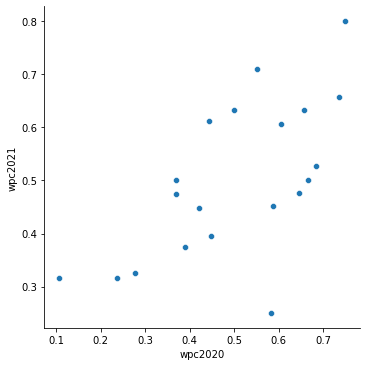

In [58]:
sns.relplot(x="wpc2020", y="wpc2021", data =Half2predictor)

In [59]:
#The complete result of the ratios for every team, with this you can evaluate which team overperformed or underperformed
keyvars = keyvars.sort_values(by=['wpc2021'],ascending=False)
keyvars

,team,wpc2020,wpc2021,pyth2020,pyth2021
11,Man City,0.750000,0.800000,0.850442,0.882219
4,Chelsea,0.552632,0.710526,0.673053,0.787154
12,Man Utd,0.736842,0.657895,0.674649,0.791329
0,Arsenal,0.500000,0.631579,0.594382,0.719101
10,Liverpool,0.657895,0.631579,0.738802,0.706098
8,Leeds,0.444444,0.611111,0.437743,0.699667
18,West Ham,0.605263,0.605263,0.600989,0.662162
9,Leicester,0.684211,0.526316,0.735294,0.564249
13,Newcastle,0.368421,0.500000,0.240356,0.465558
16,Spurs,0.666667,0.500000,0.790276,0.609756


In [38]:
keyvars.to_excel('Predicted2021PL.xlsx')

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?